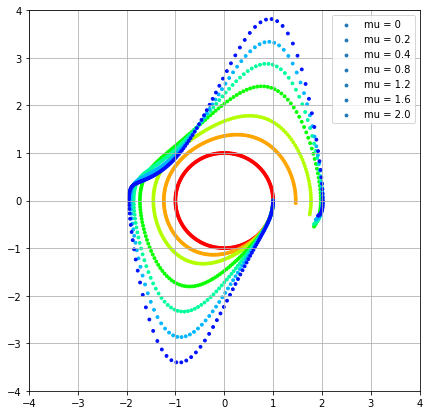

In [4]:
#
# Limit cycle of Van der Pol oscillator 
#
# Dt(x) = v
# Dt(v) = - x - mu (x^2 - 1) v
#

import functools
import numpy as np; Np = np.array
import matplotlib.pyplot as plt
import ipywidgets as ipyw


# Explicit Runge-Kutta 4th order
def solve(dt, f, t, x):
    k1 = f(t           , x                )
    k2 = f(t + 1/2 * dt, x + 1/2 * dt * k1)
    k3 = f(t + 1/2 * dt, x + 1/2 * dt * k2)
    k4 = f(t + 1   * dt, x + 1   * dt * k3)
    return x + dt * (1/6 * k1 + 2/6 * k2 + 2/6 * k3 + 1/6 * k4)


# Van der Pol equation
def f(t, arg, mu):
    x, v = arg
    dx = v
    dv = - x - mu * (x**2 - 1) * v
    return Np([dx, dv])


def _0(mu=2.0, ax=False, color=False):
    # parameter setup
    x0, v0 = 1, 0
    dt = 0.03
    N = int(2 * np.pi / dt) # so that it fits period for mu = 0

    # system setup
    t = 0
    x = Np([x0, v0])
    ff = functools.partial(f, mu=mu)

    # numerical integration
    ls_x = [x]
    ls_t = [t]
    for i in range(N):
        x = solve(dt, ff, t, x)
        t += dt
        ls_t += [t]
        ls_x += [x]
    ls_t = Np(ls_t)
    ls_x = Np(ls_x)

    # plotting
    x, y = ls_x.T
    if color is not False:
        color = color * np.ones(N + 1)
    else:
        color = np.linspace(0, 1, num=N + 1)  # hsv color gradient by time
    if ax is False:
        fig, ax = plt.subplots(figsize=(7, 7))
    ax.set(xlim=[-4, 4], ylim=[-4, 4])
    ax.grid()
    ax.scatter(x, y, c=color, s=8, vmin=0, vmax=1, cmap='hsv', label=f"mu = {mu}")
    ax.legend()


def _1(ls_mu):
    fig, ax = plt.subplots(figsize=(7, 7))
    colors = np.linspace(0, 1, num=len(ls_mu)) * (2 / 3)
    for mu, color in zip(ls_mu, colors):
        _0(mu, ax, color)


# _0(2.0)
_1([0, 0.2, 0.4, 0.8, 1.2, 1.6, 2.0])

# UI
# ipyw.interact(_0, mu=(0, 8, 0.1))

In [1]:
#
# Extract data from pdf
#

import tempfile, subprocess
import requests

    
def get_pdf(url):
    resp = requests.get(url)
    with tempfile.NamedTemporaryFile() as f:
        f.write(resp.content)
        status, result = subprocess.getstatusoutput(f"pdftotext {f.name} -")
        assert status == 0
        return result


url = 'https://www.mhlw.go.jp/content/10900000/000622162.pdf'
result = get_pdf(url)

In [2]:
#
# Extract data from pdf (contd.) : Manual processing
#

import re
import pandas
import numpy as np; Np = np.array

xx = [x.split('\n') for x in result.split('\n\n')]
yy = [x for x in xx if len(x) > 8]
yy[0] = yy[0][2:]
ww = Np(yy).T
pp = ww[:, 0]
qq = np.vectorize(lambda s: np.int(re.sub('[^\d]', '', s)))(ww[:, 1::2])
df = pandas.DataFrame([pp, *qq.T]).T
df

,0,1,2,3,4,5,6,7,8,9,10,11
0,全 国,3191,3569,3817,4168,4667,5246,5902,6616,7123,7509,7964
1,北海道,193,194,194,198,208,226,239,255,267,272,279
2,青森,11,11,11,11,12,14,14,22,22,22,22
3,岩手,0,0,0,0,0,0,0,0,0,0,0
4,宮城,20,23,26,27,34,36,37,46,52,54,64
5,秋田,10,11,11,11,11,11,12,13,15,15,16
6,山形,6,10,13,19,22,27,27,32,34,35,39
7,福島,14,16,16,24,29,33,36,37,38,38,39
8,茨城,59,64,71,77,77,81,82,91,109,110,116
9,栃木,14,14,14,15,21,31,31,32,35,36,38


Category:  全 国


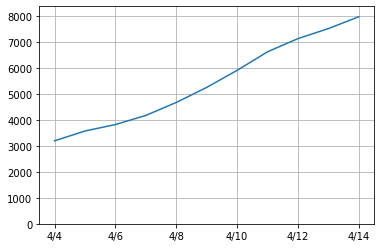

In [3]:
#
# Extract data from pdf (contd.) : Plotting
#

import matplotlib.pyplot as plt
import ipywidgets as ipyw

def _(i=0):
    print("Category: ", pp[i])
    x = np.arange(qq.shape[1])
    y = qq[i, :]

    fig, ax = plt.subplots()
    ax.set(ylim=[0, np.max(y) * 1.05], xticks=x[::2], xticklabels=[f"4/{4 + i}" for i in x][::2])
    ax.grid()
    ax.plot(x, y)

_(0)
# ipyw.interact(_, i=(0, qq.shape[0] - 1, 1))